***Assignment:-5***<br>
Name: CHINTAM SRAVAN KUMAR <br>
Registration Number: 21BCE7822 <br>
Branch: Computer Science and Engineering with Specialization Data Analytics <br>
Mail ID: sravan.21bce7822@vitapstudent.ac.in <br>
Evening Batch :6pm-8pm <br>
Campus: VIT-AP <br>
Course: Artificial Intelligence and Machine Learning <br>

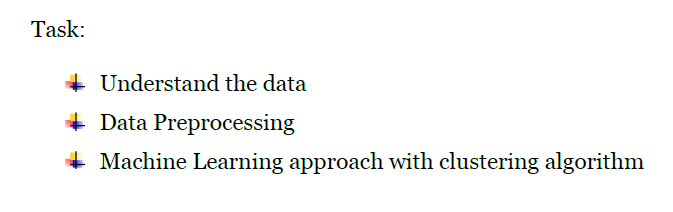

## Data Preprocessing

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [54]:
df=pd.read_csv("/content/Mall_Customers.csv")

In [55]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [57]:
df.shape

(200, 5)

In [58]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##Performing Univariate Analysis

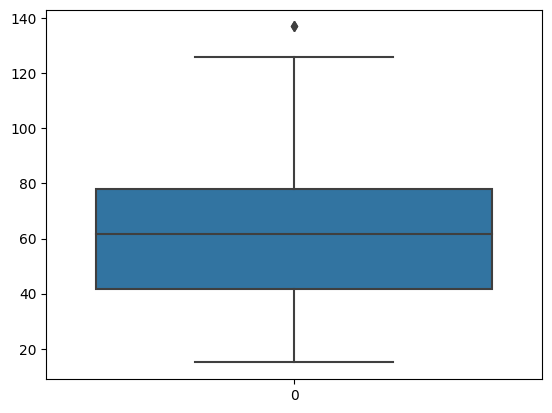

In [59]:
x1=df['Annual Income (k$)']
sns.boxplot(x1)
plt.show()

<ipython-input-60-99cfdf892475>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x2)


<Axes: xlabel='Age', ylabel='Density'>

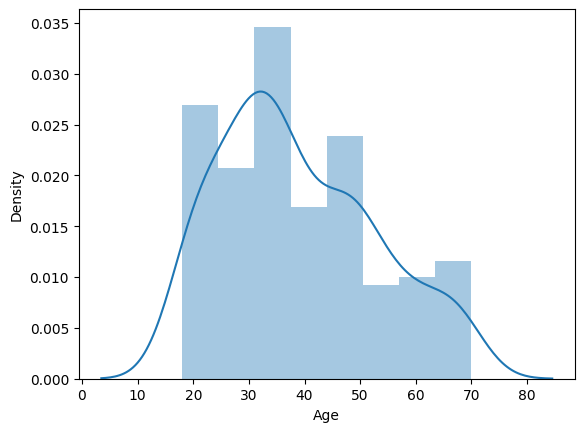

In [60]:
x2=df["Age"]
sns.distplot(x2)

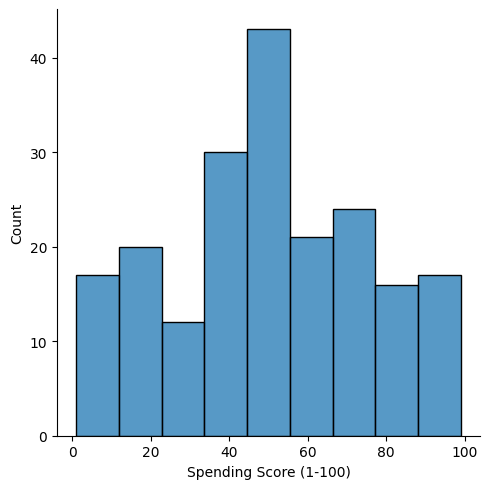

In [61]:
x2=df['Spending Score (1-100)']
sns.displot(x2)

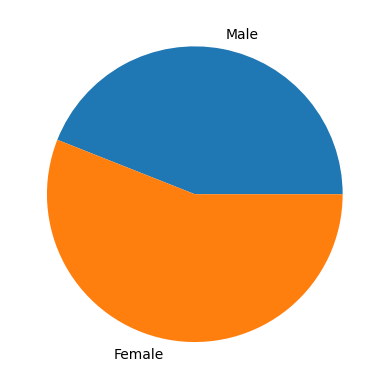

In [62]:
x2=df['Gender']
m=0
f=0
for i in x2:
  if i=="Male":
    m+=1
  else:
    f+=1
plt.pie([m,f],labels=["Male","Female"])
plt.show()

##Bi-Variate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

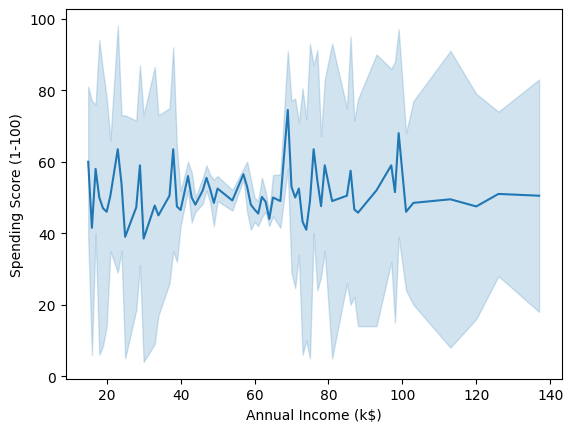

In [63]:
x1=df['Annual Income (k$)']
x2=df['Spending Score (1-100)']
sns.lineplot(x=x1,y=x2)

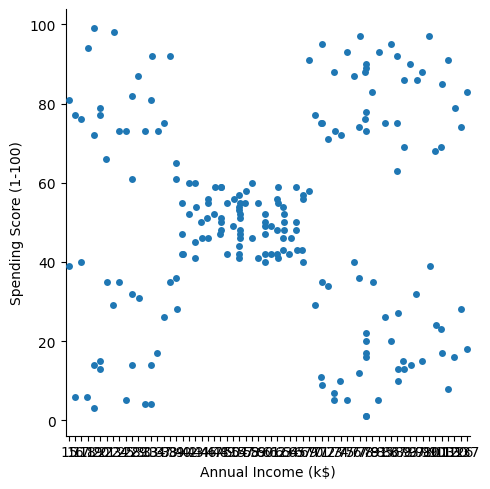

In [64]:
x1=df['Annual Income (k$)']
x2=df['Spending Score (1-100)']
sns.catplot(x=x1,y=x2)

##Multi-Variate Analysis

<ipython-input-65-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

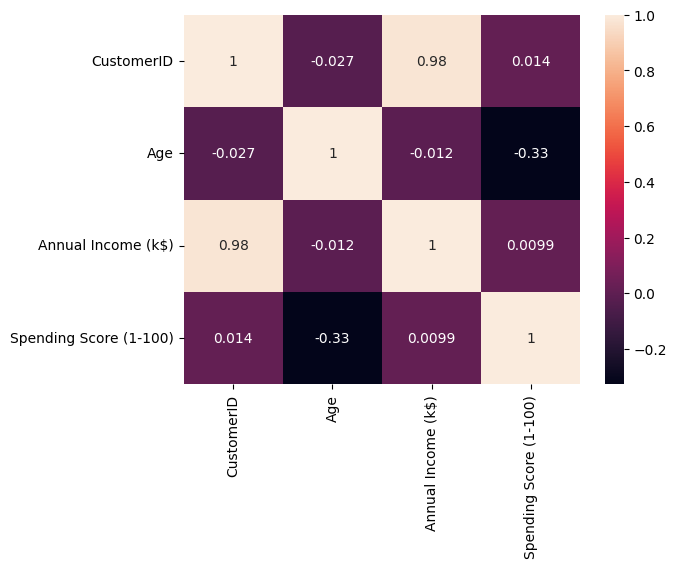

In [65]:
sns.heatmap(df.corr(),annot=True)

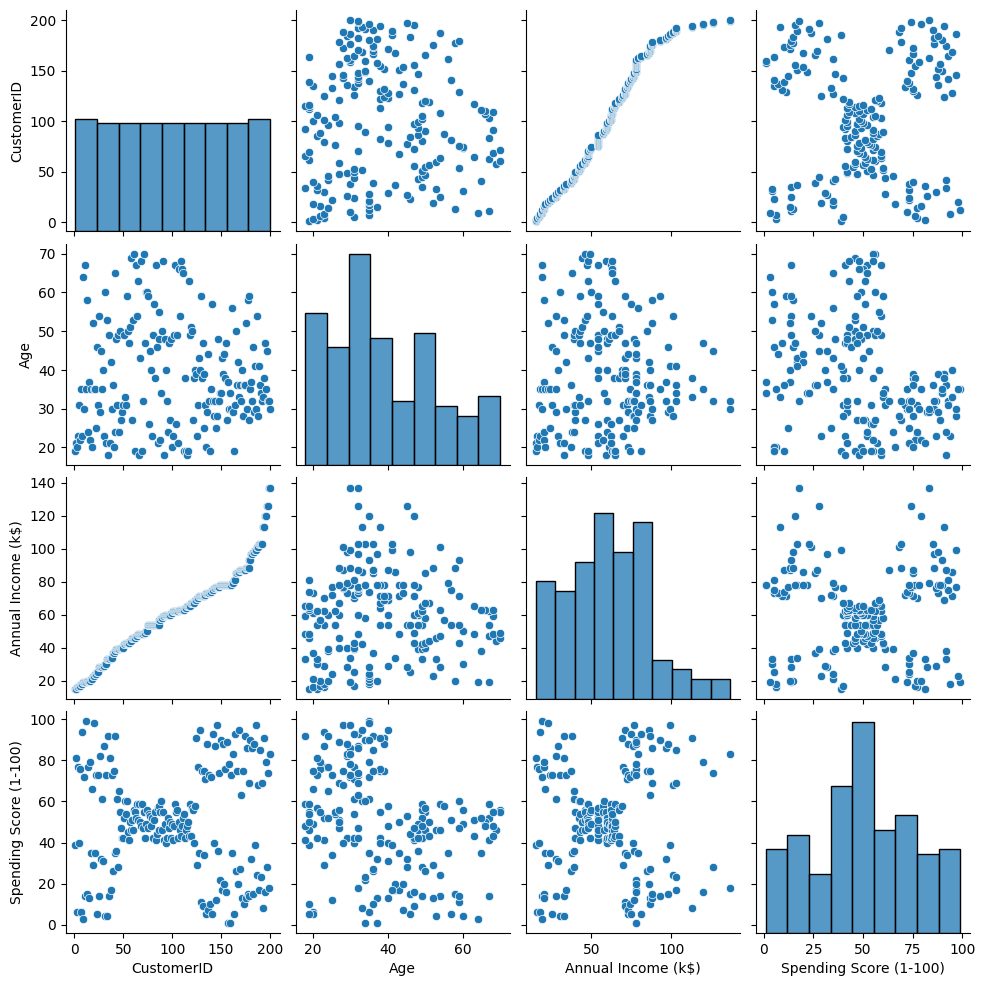

In [66]:
sns.pairplot(df)

##Performing Descriptive Statistics

In [67]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##Checking Missing values and dealing with them

In [68]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

##Label Encoding

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
le=LabelEncoder()

In [71]:
df.Gender=le.fit_transform(df.Gender)

In [72]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## Outlier Analysis


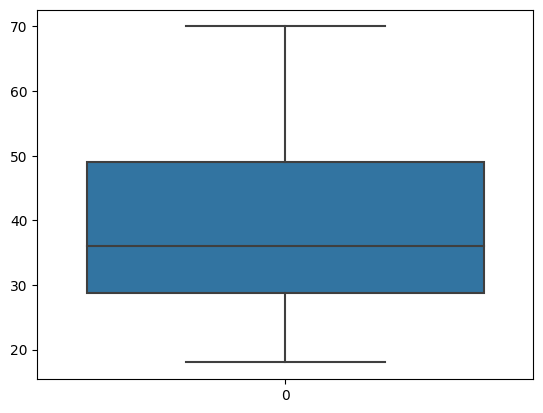

In [73]:
x1=df['Age']
sns.boxplot(x1)
plt.show()
#No Outliers

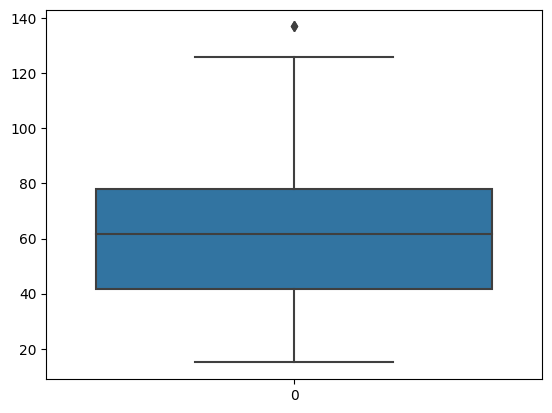

In [74]:
x1=df['Annual Income (k$)']
sns.boxplot(x1)
plt.show()
#Outlier is there

<Axes: >

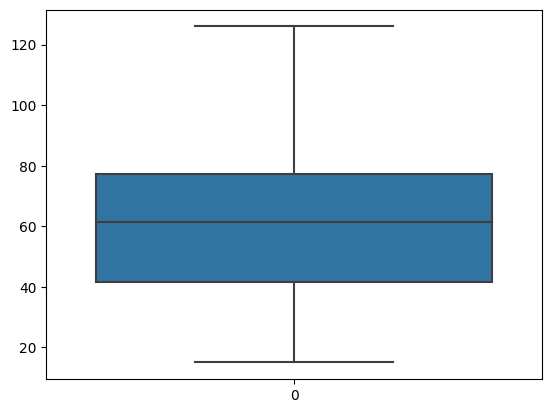

In [75]:
#Replacing Outlier with median
q1=df['Annual Income (k$)'].quantile(0.25) #Q1
q3=df['Annual Income (k$)'].quantile(0.75) #Q3
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
df.median()
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>upper_limit,61.5,df['Annual Income (k$)'])
sns.boxplot(df['Annual Income (k$)'])

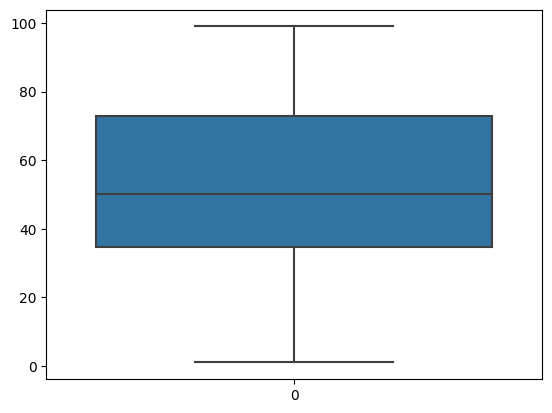

In [76]:
x1=df['Spending Score (1-100)']
sns.boxplot(x1)
plt.show()

## X and Y split, independent variable and dependent variable

In [85]:
y=df['Spending Score (1-100)']
y.head()

0    39
1    81
2     6
3    77
4    40
Name: Spending Score (1-100), dtype: int64

In [84]:
#Removing customer_id also as it will not play role in prediction
x=df.drop(columns=['CustomerID','Spending Score (1-100)'],axis=1)
x.head()

,Gender,Age,Annual Income (k$)
0,1,19,15.0
1,1,21,15.0
2,0,20,16.0
3,0,23,16.0
4,0,31,17.0


## Scaling on independent variables

In [86]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [89]:
x_scaled=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_scaled.head()

,Gender,Age,Annual Income (k$)
0,1.0,0.019231,0.000000
1,1.0,0.057692,0.000000
2,0.0,0.038462,0.009009
3,0.0,0.096154,0.009009
4,0.0,0.250000,0.018018


## Train test split

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=0)

In [93]:
x_train.shape

(140, 3)

In [92]:
x_test.shape

(60, 3)

## Applying Kmeans Clustering algorithm

In [95]:
from sklearn import cluster

In [101]:
error=[]
for i in range(1,11):
  kmeans = cluster.KMeans(n_clusters=i,init = 'k-means++',random_state=0)
  kmeans.fit(x_scaled)
  error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

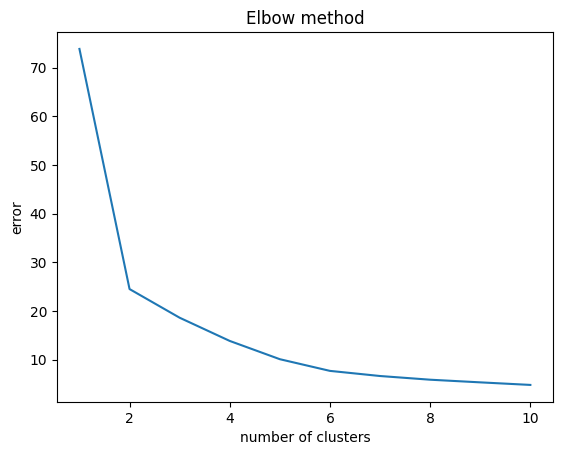

In [102]:
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()


In [103]:
km_model = cluster.KMeans(n_clusters=3,init = 'k-means++',random_state=0)

In [104]:
km_model.fit(x_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [106]:
km_model.predict([[1.0,0.057692,0.000000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

In [107]:
km_model.predict([[0.0,0.057692,0.087000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [108]:
km_model.predict([[0.0,0.097692,0.087000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)